### Анализ игр для планирования рекламной компании

**Цель проекта :** выявить определяющие успешность игры закономерности и спланировать рекламную кампанию на 2017 год интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

### Содержание:
<a href = '#Sect1'>  <b> Шаг 1: Общая информация </b> </a></p> 
<p><a href = '#Sect2'>  <b> Шаг 2: Подготовка данных</b></a></p>
<p><a href = '#Sect3'>  <b> Шаг 3: Исследовательский анализ данных</b></a></p>
<p><a href = '#Sect4'>  <b> Шаг 4: Портрет пользователя каждого региона</b></a></p>
<p><a href = '#Sect5'>  <b> Шаг 5: Проверка гипотез</b></a></p> 
<p><a href = '#Sect6'>  <b> Шаг 6: Общий вывод</b></a></p> 

### <a id = 'Sect1'></a> Шаг 1. Общая информация


In [1]:
import pandas as pd
from IPython.display import display 
import warnings
warnings.filterwarnings('ignore')

#импорт файла 
games = pd.read_csv('/datasets/games.csv')
display(games.head())
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


где
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### <a id = 'Sect2'></a>Шаг 2. Подготовка данных


приведем к нижнему регистру названия столбцов:

In [2]:
games.columns = map(str.lower, games.columns)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [3]:
#поиск пропусков в данных
print(games.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


в колонках 'critic_score', 'user_score', 'rating' много пропусков - это может повлиять на объективность анализа если выводы будут основаны на этих показателях

заполним пропуски в колонках "name", 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'

In [4]:
games['year_of_release'] = games['year_of_release'].fillna(9999)
games['year_of_release'] = games['year_of_release'].astype('int')

games['critic_score'] = games['critic_score'].fillna(9999)
games['user_score'] = games['user_score'].fillna(9999)
games['rating'] = games['rating'].fillna('unknown')
games['genre'] = games['genre'].fillna('unknown')
games['name'] = games['name'].fillna('unknown')

display(games.query('year_of_release == 9999').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,9999,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,9999,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,9999,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,9999,Fighting,1.57,1.02,0.00,0.41,9999.0,9999,unknown
609,Space Invaders,2600,9999,Shooter,2.36,0.14,0.00,0.03,9999.0,9999,unknown


в колонке "user_score" есть рейтинг tbd - возможно это означает "to be determinend", это может помешать обработке данных при обращении к данным как числам, узнаем сколько таких игр

In [5]:
display(games.query('user_score == "tbd"')['user_score'].count())
display(games.query('user_score == "tbd"').head())


2424

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,9999.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,9999.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,9999,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


произведем замену этих данных, но таким образом, чтобы  они отличались от того, на что мы заменили пропущенные значения

In [6]:
games['user_score'].replace('tbd', '8888', inplace=True)
games['user_score'] = games['user_score'].astype('float')
display(games.query('user_score == "8888"').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,9999.0,8888.0,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,8888.0,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,9999.0,8888.0,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,8888.0,E
657,Frogger's Adventures: Temple of the Frog,GBA,9999,Adventure,2.15,0.18,0.0,0.07,73.0,8888.0,E


Посчитаем суммарные продажи во всех регионах и запишем их в столбец "total sales"

In [7]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,9999.0,9999.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,9999.0,9999.0,unknown,31.38


### <a id = 'Sect3'></a>Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

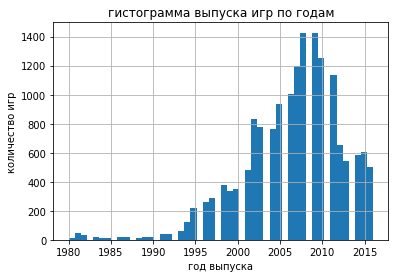

In [8]:
import matplotlib.pyplot as plt
import matplotlib 
games.query('year_of_release != 9999')['year_of_release'].hist(bins = 50)
plt.title('гистограмма выпуска игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

после 1995 года производство игр активно развивалось

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [9]:
platforms = games.pivot_table('total_sales', index = 'platform', aggfunc = 'sum')
display(platforms.sort_values(by ='total_sales', ascending = False).head(10))
top_10 = platforms.sort_values(by ='total_sales', ascending = False).head(10).index.values.tolist()
print(top_10)


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


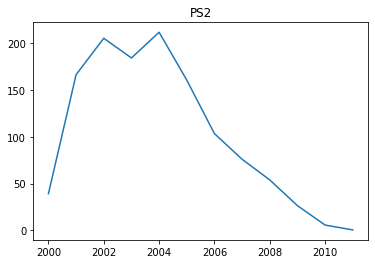

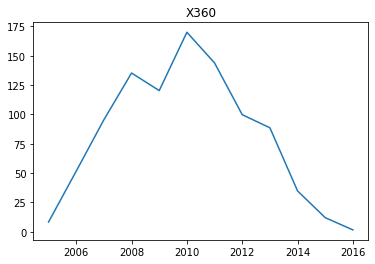

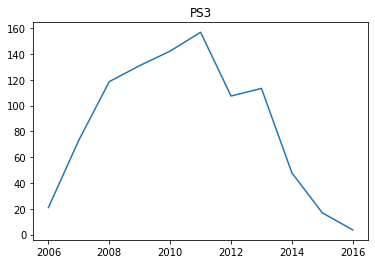

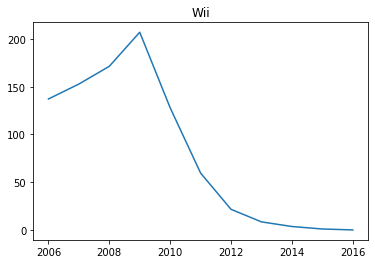

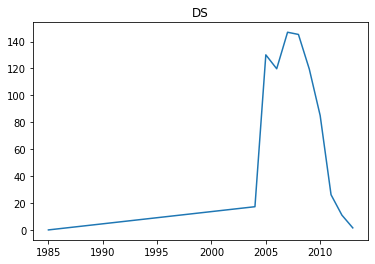

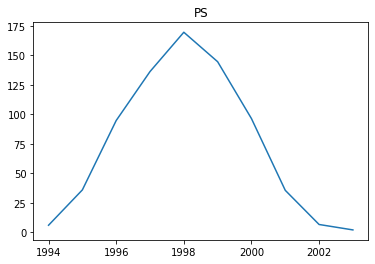

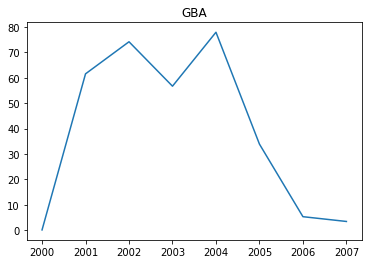

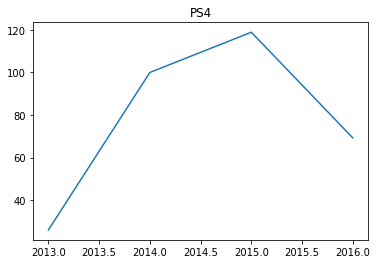

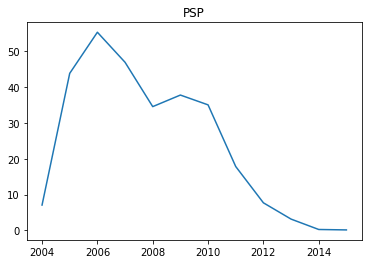

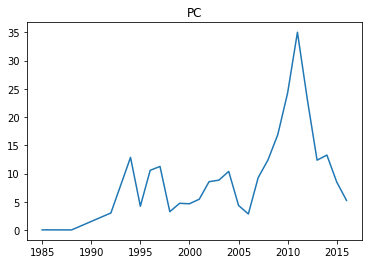

In [10]:
for i in top_10:
    df = games.query('(platform == @i) and (year_of_release != 9999)').pivot_table('total_sales', index = 'year_of_release', aggfunc = 'sum')
    plt.plot(df.index, df.values)
    plt.title(i)
    plt.show()


узнаем какова средняя продолжительность жизни платформы

In [11]:
platform_life = games.query('(platform in @top_10) and (year_of_release != 9999)').pivot_table('year_of_release', index={'platform'}, aggfunc = {'max', 'min'})
platform_life['period'] = platform_life['max'] - platform_life['min']
print('появляются новые и исчезают старые платформы в среднем за ',platform_life['period'].median(), 'лет')
display(platform_life)

появляются новые и исчезают старые платформы в среднем за  10.5 лет


,max,min,period
platform,,,
DS,2013,1985,28
GBA,2007,2000,7
PC,2016,1985,31
PS,2003,1994,9
PS2,2011,2000,11
PS3,2016,2006,10
PS4,2016,2013,3
PSP,2015,2004,11
Wii,2016,2006,10


За актуальный период принимаем данные за 2011-2016 год. найдем самые прибыльные платформы за этот период

In [12]:
games = games.query('(year_of_release >= 2011) and (year_of_release <= 2016)')

In [13]:
games_actual = games.pivot_table('total_sales', index = 'platform', columns = 'year_of_release', aggfunc = 'sum')
games_actual = games_actual.fillna(0)
games_actual.columns = ['2011', '2012', '2013', '2014', '2015', '2016']
games_actual['total'] = games_actual['2011'] + games_actual['2012'] + games_actual['2013'] + games_actual['2014'] + games_actual['2015'] + games_actual['2016']
games_actual = games_actual.sort_values(by = 'total', ascending = False)
display(games_actual)

,2011,2012,2013,2014,2015,2016,total
platform,,,,,,,
PS3,156.78,107.36,113.25,47.76,16.82,3.60,445.57
X360,143.84,99.74,88.58,34.74,11.96,1.52,380.38
PS4,0.00,0.00,25.99,100.00,118.90,69.25,314.14
3DS,63.20,51.36,56.57,43.76,27.78,15.14,257.81
XOne,0.00,0.00,18.96,54.07,60.14,26.15,159.32
PC,35.03,23.22,12.38,13.28,8.52,5.25,97.68
Wii,59.65,21.71,8.59,3.75,1.14,0.18,95.02
WiiU,0.00,17.56,21.65,22.03,16.35,4.60,82.19
PSV,4.63,16.19,10.59,11.90,6.25,4.25,53.81


PS3 за период 5 лет лидирует по продажам, но с 2014 года ее опережает PS4, также начиная с 2013 года активно развивается XOne. Однако продажи всех лидирующих платформ падают, потенциально переспективными являются Wii, PSV, 3DS. продажи  платформы X360 в 2011 году были на втором месте, а в 2016 на последнем месте.

для наглядности построим графики продаж для этих платформ зв период 2011-2016 года

In [14]:
platf_actual = games_actual.index.values.tolist()
print(platf_actual)

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS', 'PSP', 'PS2']


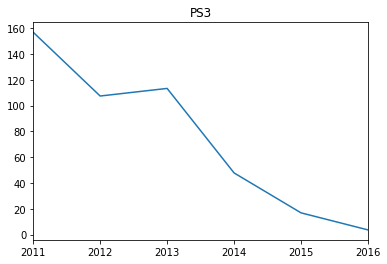

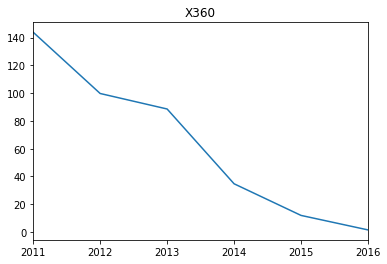

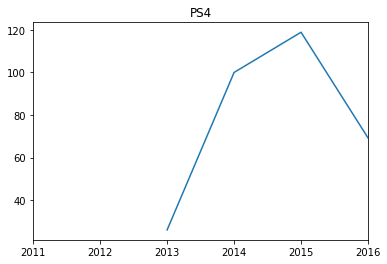

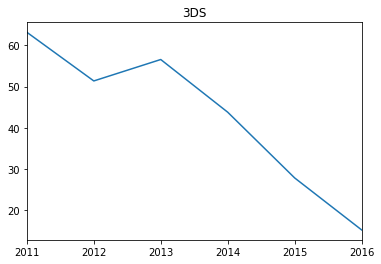

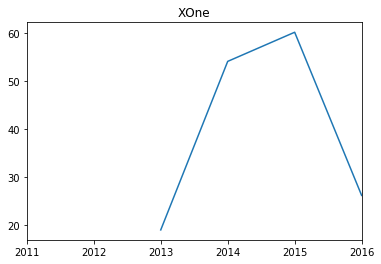

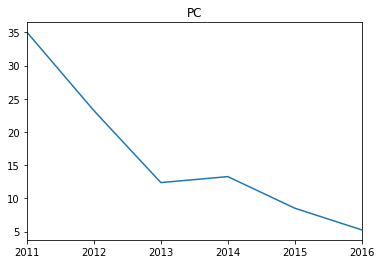

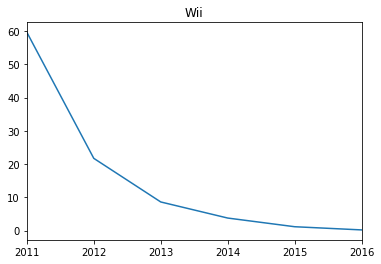

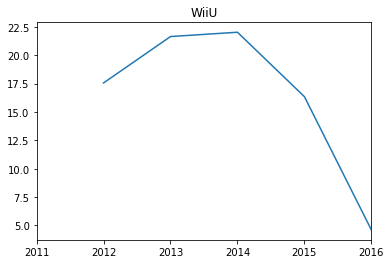

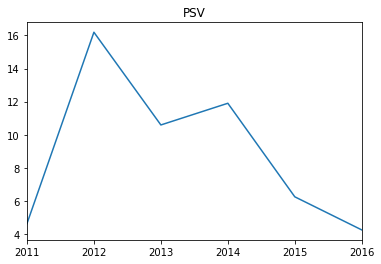

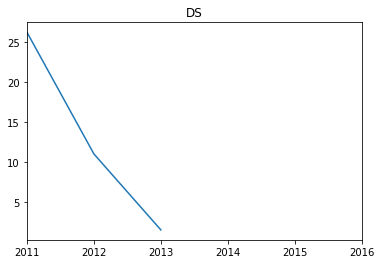

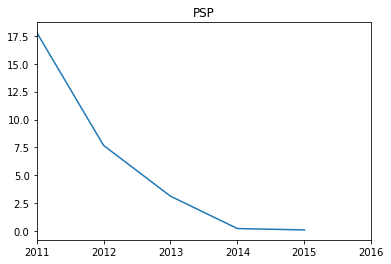

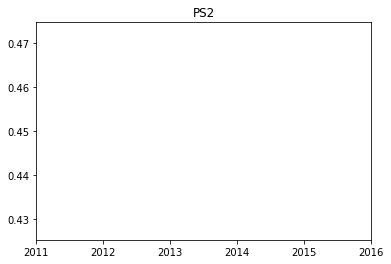

In [15]:
for i in platf_actual:
    df = games.query('platform == @i').pivot_table('total_sales', index = 'year_of_release', aggfunc = 'sum')
    plt.plot(df.index, df.values)
    plt.xlim(right = 2016)
    plt.xlim(left = 2011)
    plt.title(i)
    plt.show()

на графиках видно, что к 2016 году продажи всех платформ сократились, некоторые успешные платформы прекратили выпуск игр, другие появились и начали активно конкурировать с лидерами

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам

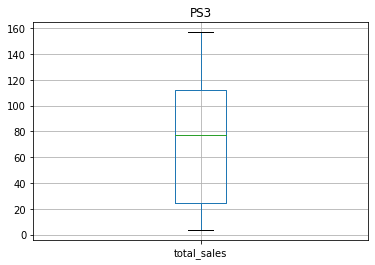

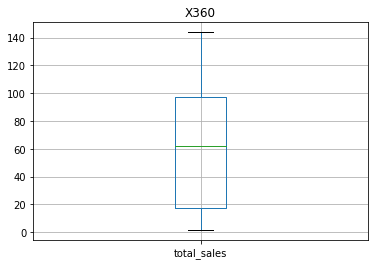

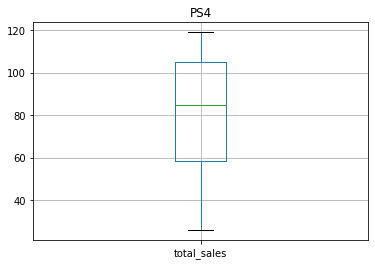

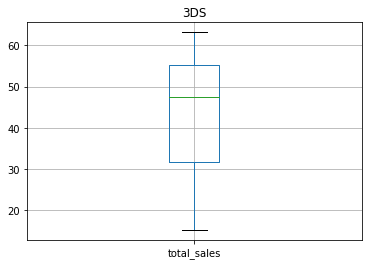

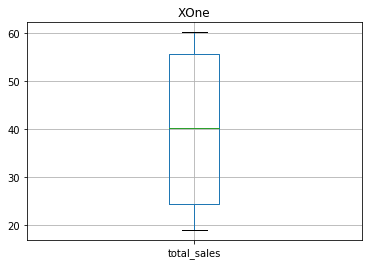

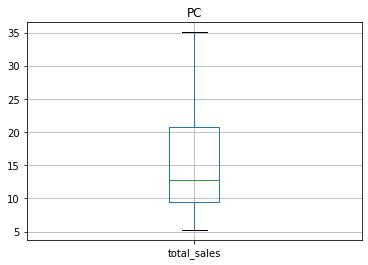

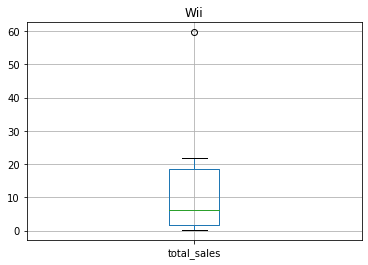

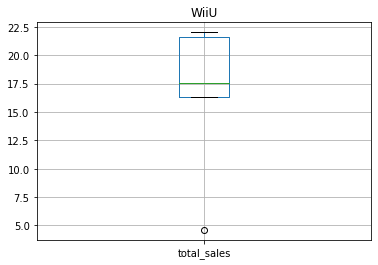

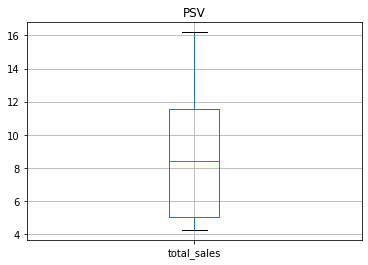

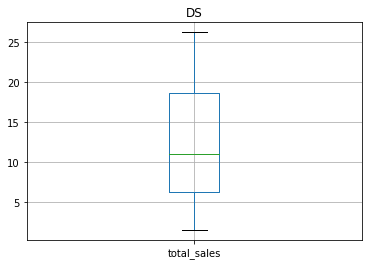

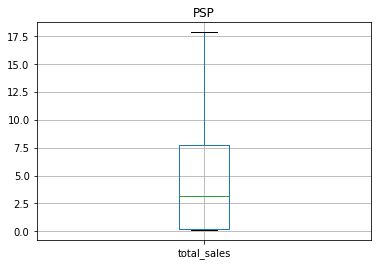

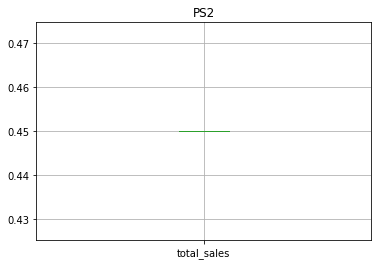

In [16]:
for i in platf_actual:
    df = games.query('platform == @i').pivot_table('total_sales', index = 'year_of_release', aggfunc = 'sum')
    df.boxplot()
    plt.title(i)
    plt.show()

значения полученные на диаграммах размаха свидетельствуют о том какие платформы были наиболее прибыльными за 5 лет с 2011 до 2016 год. Лидеры продаж PS3, X360, PS4, Xone, 3DS

Посмотрим, как влияют на продажи внутри PS3 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

корреляция продаж PS3 от отзывов критиков (рейтинг определен) 0.38011114718290767


Text(0.5, 1.0, 'зависимость продаж PS3 от отзывов критиков (рейтинг неопределен)')

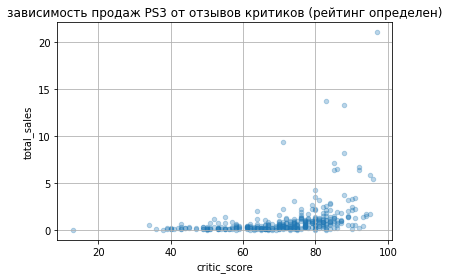

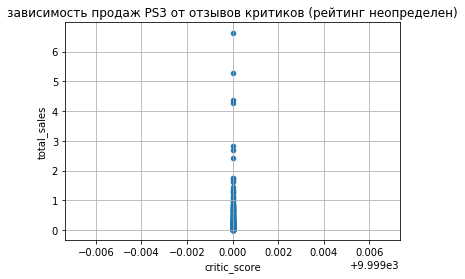

In [17]:
#рейтинг определен
games.query('(platform == "PS3") and (critic_score < 100)').plot(x='critic_score', y='total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('зависимость продаж PS3 от отзывов критиков (рейтинг определен)')
print('корреляция продаж PS3 от отзывов критиков (рейтинг определен)',games.query('(platform == "PS3") and (critic_score < 100)')['total_sales'].corr(games.query('(platform == "PS3") and (critic_score < 100)')['critic_score']))

#рейтинг неопределен
games.query('(platform == "PS3") and (critic_score == 9999)').plot(x='critic_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж PS3 от отзывов критиков (рейтинг неопределен)')

зависимость продаж PS3 от отзывов пользователей

корреляция продаж PS3 от отзывов пользователей (рейтинг определен) 0.014089348308019395


Text(0.5, 1.0, 'зависимость продаж от отзывов пользователей (рейтинг tbd)')

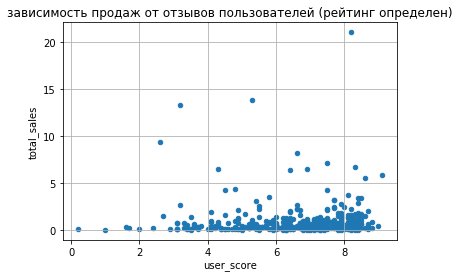

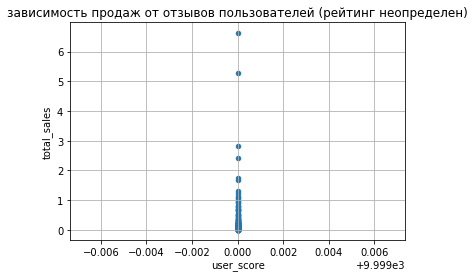

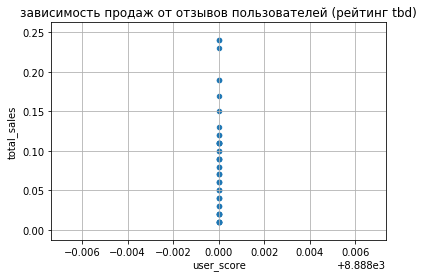

In [18]:
#рейтинг определен
games.query('(platform == "PS3") and (user_score < 100)').plot(x='user_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж от отзывов пользователей (рейтинг определен)')
print('корреляция продаж PS3 от отзывов пользователей (рейтинг определен)',games.query('(platform == "PS3") and (user_score < 100)')['total_sales'].corr(games.query('(platform == "PS3") and (user_score < 100)')['user_score']))

#рейтинг неопределен
games.query('(platform == "PS3") and (user_score == 9999)').plot(x='user_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж от отзывов пользователей (рейтинг неопределен)')

#рейтинг tbd
games.query('(platform == "PS3") and (user_score == 8888)').plot(x='user_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж от отзывов пользователей (рейтинг tbd)')

корреляции между пользовательским рейтингом и продажами меньше

Соотнесем выводы с продажами игр на других платформах

зависимость продаж и рейтинга критиков:

корреляция продаж остальных платформ от отзывов критиков (рейтинг определен) 0.3175859131847344


Text(0.5, 1.0, 'зависимость продаж остальных платформ от отзывов критиков (рейтинг неопределен)')

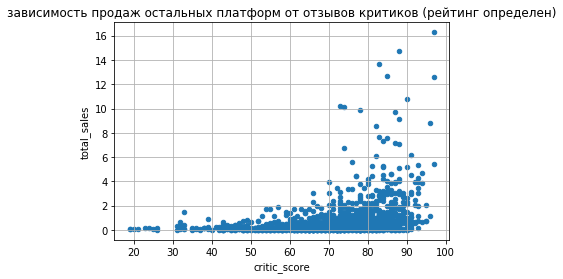

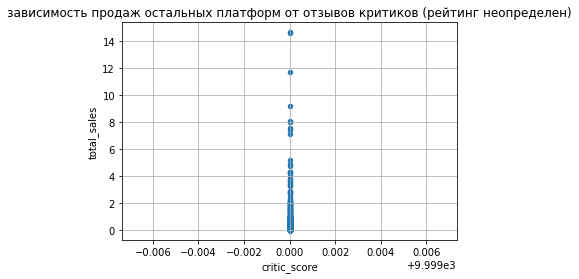

In [19]:
#рейтинг определен
games.query('(platform != "PS3") and (critic_score < 100)').plot(x='critic_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж остальных платформ от отзывов критиков (рейтинг определен)')
print('корреляция продаж остальных платформ от отзывов критиков (рейтинг определен)',games.query('(platform != "PS3") and (critic_score < 100)')['total_sales'].corr(games.query('(platform != "PS3") and (critic_score < 100)')['critic_score']))

#рейтинг неопределен
games.query('(platform != "PS3") and (critic_score == 9999)').plot(x='critic_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж остальных платформ от отзывов критиков (рейтинг неопределен)')

видно, что есть небольшая зависимость величины продаж от рейтинга критиков 

проверим зависимость от отзывов пользователей:

корреляция продаж остальных платформ от отзывов пользователей (рейтинг определен) 0.038434918431186085


Text(0.5, 1.0, 'зависимость продаж остальных платформ от отзывов пользователей  (рейтинг tbd)')

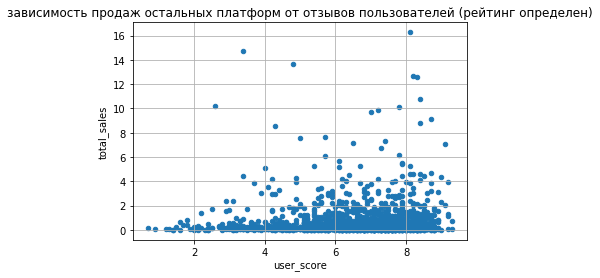

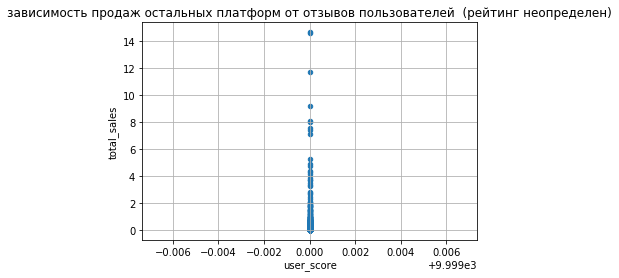

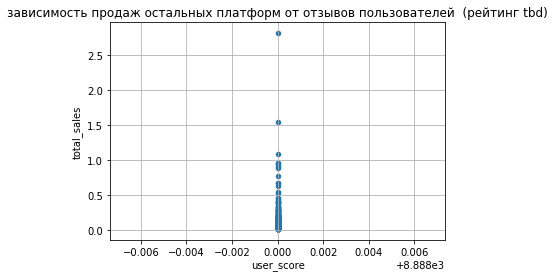

In [20]:
#рейтинг определен
games.query('(platform != "PS3") and (user_score < 100)').plot(x='user_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж остальных платформ от отзывов пользователей (рейтинг определен)')
print('корреляция продаж остальных платформ от отзывов пользователей (рейтинг определен)',games.query('(platform != "PS3") and (user_score < 100)')['total_sales'].corr(games.query('(platform != "PS3") and (user_score < 100)')['user_score']))

#рейтинг невнесен
games.query('(platform != "PS3") and (user_score == 9999)').plot(x='user_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж остальных платформ от отзывов пользователей  (рейтинг неопределен)')

#рейтинг tbd
games.query('(platform != "PS3") and (user_score == 8888)').plot(x='user_score', y='total_sales', kind = 'scatter', grid = True)
plt.title('зависимость продаж остальных платформ от отзывов пользователей  (рейтинг tbd)')

Посмотрим на общее распределение игр по жанрам

In [21]:
genres = games.pivot_table('total_sales', index = 'genre', aggfunc = {'sum', 'count'})
display(genres.sort_values(by = 'sum', ascending = False))

,count,sum
genre,,
Action,1269,557.80
Shooter,329,402.91
Role-Playing,465,245.63
Sports,389,237.15
Misc,375,139.42
Platform,122,88.68
Racing,180,88.31
Fighting,159,66.90
Simulation,136,50.26


значительно опережают игры жанра "Action", также прибыльными являются игры жанра "Shooter", "Role-Playing", "Sports" , а жанры "Strategy",  "Puzzle" и "Adventure" наименее популярны, жанры игр типа "Platform", "Misc", "Fighting", "Racing" являются средне прибыльными

### <a id = 'Sect4'></a>Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [22]:
games_na = games.pivot_table(values = {'na_sales','total_sales'}, index = 'platform', aggfunc = 'sum')
games_na['na_share, %'] = games_na['na_sales']/games_na['total_sales']*100
games_na['na_share, %'] = games_na['na_share, %'].astype('int')
display(games_na.sort_values(by = 'na_sales', ascending = False).head())

games_eu = games.pivot_table(values = {'eu_sales','total_sales'}, index = 'platform', aggfunc = 'sum')
games_eu['eu_share, %'] = games_eu['eu_sales']/games_eu['total_sales']*100
games_eu['eu_share, %'] = games_eu['eu_share, %'].astype('int')
display(games_eu.sort_values(by = 'eu_sales', ascending = False).head())

games_jp = games.pivot_table(values = {'jp_sales','total_sales'}, index = 'platform', aggfunc = 'sum')
games_jp['jp_share, %'] = games_jp['jp_sales']/games_jp['total_sales']*100
games_jp['jp_share, %'] = games_jp['jp_share, %'].astype('int')
display(games_jp.sort_values(by = 'jp_sales', ascending = False).head())

,na_sales,total_sales,"na_share, %"
platform,,,
X360,226.80,380.38,59
PS3,168.26,445.57,37
PS4,108.74,314.14,34
XOne,93.12,159.32,58
3DS,82.65,257.81,32


,eu_sales,total_sales,"eu_share, %"
platform,,,
PS3,163.10,445.57,36
PS4,141.09,314.14,44
X360,117.10,380.38,30
3DS,61.27,257.81,23
PC,56.70,97.68,58


,jp_sales,total_sales,"jp_share, %"
platform,,,
3DS,100.62,257.81,39
PS3,49.39,445.57,11
PSP,24.04,29.01,82
PSV,21.84,53.81,40
PS4,15.96,314.14,5


в северной америке наиболее прибыльны игры платформы X360, в Европе PS3 и PS4, в Японии 3DS   

Самые популярные жанры (топ-5) в регионах:

In [23]:
games_na = games.pivot_table(values = {'na_sales','total_sales'}, index = 'genre', aggfunc = 'sum')
games_na['na_share, %'] = games_na['na_sales']/games_na['total_sales']*100
games_na['na_share, %'] = games_na['na_share, %'].astype('int')
display(games_na.sort_values(by = 'na_sales', ascending = False).head())

games_eu = games.pivot_table(values = {'eu_sales','total_sales'}, index = 'genre', aggfunc = 'sum')
games_eu['eu_share, %'] = games_eu['eu_sales']/games_eu['total_sales']*100
games_eu['eu_share, %'] = games_eu['eu_share, %'].astype('int')
display(games_eu.sort_values(by = 'eu_sales', ascending = False).head())

games_jp = games.pivot_table(values = {'jp_sales','total_sales'}, index = 'genre', aggfunc = 'sum')
games_jp['jp_share, %'] = games_jp['jp_sales']/games_jp['total_sales']*100
games_jp['jp_share, %'] = games_jp['jp_share, %'].astype('int')
display(games_jp.sort_values(by = 'jp_sales', ascending = False).head())

,na_sales,total_sales,"na_share, %"
genre,,,
Action,230.92,557.80,41
Shooter,194.43,402.91,48
Sports,108.70,237.15,45
Role-Playing,83.78,245.63,34
Misc,69.69,139.42,49


,eu_sales,total_sales,"eu_share, %"
genre,,,
Action,199.12,557.80,35
Shooter,148.02,402.91,36
Sports,88.48,237.15,37
Role-Playing,62.30,245.63,25
Racing,40.58,88.31,45


,jp_sales,total_sales,"jp_share, %"
genre,,,
Role-Playing,79.87,245.63,32
Action,63.62,557.80,11
Misc,17.60,139.42,12
Fighting,12.38,66.90,18
Platform,12.13,88.68,13


в Северной Америке и Европе на первом-втором месте игры жанра "Action" и "Shooter", в Японии на первом месте "Role-Playing"   

проверим влияет ли рейтинг ESRB на продажи в отдельном регионе

In [24]:
games_na = games.pivot_table(values = {'na_sales','total_sales'}, index = 'rating', aggfunc = 'sum')
games_na['na_share, %'] = games_na['na_sales']/games_na['total_sales']*100
games_na['na_share, %'] = games_na['na_share, %'].astype('int')
display(games_na.sort_values(by = 'na_sales', ascending = False).head())

games_eu = games.pivot_table(values = {'eu_sales','total_sales'}, index = 'rating', aggfunc = 'sum')
games_eu['eu_share, %'] = games_eu['eu_sales']/games_eu['total_sales']*100
games_eu['eu_share, %'] = games_eu['eu_share, %'].astype('int')
display(games_eu.sort_values(by = 'eu_sales', ascending = False).head())

games_jp = games.pivot_table(values = {'jp_sales','total_sales'}, index = 'rating', aggfunc = 'sum')
games_jp['jp_share, %'] = games_jp['jp_sales']/games_jp['total_sales']*100
games_jp['jp_share, %'] = games_jp['jp_share, %'].astype('int')
display(games_jp.sort_values(by = 'jp_sales', ascending = False).head())

,na_sales,total_sales,"na_share, %"
rating,,,
M,308.45,666.81,46
E,170.17,389.44,43
unknown,123.69,412.48,29
E10+,117.72,230.86,50
T,109.31,254.03,43


,eu_sales,total_sales,"eu_share, %"
rating,,,
M,250.26,666.81,37
E,141.73,389.44,36
unknown,116.61,412.48,28
T,83.16,254.03,32
E10+,78.00,230.86,33


,jp_sales,total_sales,"jp_share, %"
rating,,,
unknown,138.21,412.48,33
E,36.68,389.44,9
T,33.39,254.03,13
M,26.14,666.81,3
E10+,11.23,230.86,4


в северной америке больше всего приносят прибыли игры рейтинга "М" - для взрослых и "E" - для всех, а в Японии те игры, рейтинг которых неопределен.

### <a id = 'Sect5'></a>Шаг 5. Проверка гипотез

Проверим совпадают ли пользовательские рейтинги платформ XBox One и PC. для этого выдвенем нулевую гипотезу о том, что они совпадают. Альтернативная гипотеза : пользовательские рейтинги различны.
    Применим ttest к рейтингам платформ, примем показатель статистической значимости 𝑎𝑙𝑝ℎ𝑎=0.05 

In [25]:
from scipy import stats as st

results =  st.ttest_ind(games.query('(user_score<100) and (platform == "XOne")')['user_score'], games.query('(user_score<100) and (platform == "PC")')['user_score'], equal_var = False)
print(results.pvalue, results.pvalue > 0.05)

0.6130712247638477 True


**Вывод:** p-value получилось больше выбранного уровня $\\alpha = 0.05$. Отвергнуть нулевую гипотезу о том средние пользовательские рейтинги платформ  XBox One и PC совпадают - нельзя

Проверим совпадают ли пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»). для этого выдвенем нулевую гипотезу о том, что они отличаются. альтернативная гипотеза : пользовательские рейтинги этих жанров равны.
    Применим ttest к рейтингам платформ, примем показатель статистической значимости 𝑎𝑙𝑝ℎ𝑎=0.05 

In [26]:
results =  st.ttest_ind(games.query('(user_score<100) and (genre == "Action")')['user_score'], games.query('(user_score < 100) and (genre == "Sports")')['user_score'], equal_var = False)
print(results.pvalue, results.pvalue > 0.05)

8.285648549432565e-19 False


**Вывод:** p-value получилось меньше выбранного уровня $\\alpha = 0.05$. Отвергнуть нулевую гипотезу о том средние пользовательские рейтинги жанров Action и Sports отличаются - нельзя

### <a id = 'Sect6'></a>Шаг 6. Общий вывод

- наиболее прибыльными платформами в 2017 году должны стать игры жанра "Action", "Sports" и "Shooter" платформ PS4 и XOne

- PS3 за период 5 лет лидирует по продажам, но с 2014 года ее опережает PS4, также начиная с 2013 года активно развивается XOne. Однако продажи всех лидирующих платформ падают, потенциально переспективными являются Wii, PSV, 3DS. продажи  платформы X360 в 2011 году были на втором месте, а в 2016 на последнем месте.

- в северной америке наиболее прибыльны игры платформы X360, в Европе PS3 и PS4, в Японии 3DS   

- в Северной Америке и Европе на первом-втором месте игры жанра "Action" и "Shooter", в Японии на первом месте "Role-Playing"   

- в северной америке больше всего приносят прибыли игры рейтинга "М" - для взрослых и "E" - для всех, а в Японии те игры, рейтинг которых неопределен.

- по представленным данным прямой корреляции прибыльности платформы от отзывов критиков или пользователей не выявлено однако в исходных данных было большое количество пропусков для этих показателей
